<a href="https://colab.research.google.com/github/NitheeshMeethal/projects/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**HOTEL BOOKING ANALYSIS**

In [ ]:
#import libraries

import numpy as np
import pandas as pd


IMPORTING DATASET

In [ ]:
df=pd.read_csv("/content/Hotel Bookings.csv")

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay_in_week',
       'total_family_members'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81537 entries, 0 to 81536
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81537 non-null  object 
 1   is_canceled                     81537 non-null  int64  
 2   lead_time                       81537 non-null  int64  
 3   arrival_date_year               81537 non-null  int64  
 4   arrival_date_month              81537 non-null  object 
 5   arrival_date_week_number        81537 non-null  int64  
 6   arrival_date_day_of_month       81537 non-null  int64  
 7   stays_in_weekend_nights         81537 non-null  int64  
 8   stays_in_week_nights            81537 non-null  int64  
 9   adults                          81537 non-null  int64  
 10  children                        81533 non-null  float64
 11  babies                          81537 non-null  int64  
 12  meal                            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,81533.000000,81537.000000,81537.000000,81537.000000,81537.000000,81537.000000,69480.000000,4609.000000,81537.000000,81537.000000,81537.000000,81537.000000
mean,0.530520,112.695206,2016.041122,28.165471,15.699327,0.983210,2.669708,1.857034,0.101799,0.008548,0.034083,0.113004,0.153562,0.203956,113.561888,196.211543,2.875713,98.060807,0.071820,0.469860
std,0.499071,112.343339,0.754119,13.652905,8.785585,1.051007,2.073458,0.597639,0.398340,0.103358,0.181443,1.010728,1.680099,0.634970,119.083391,135.180733,20.257558,54.185302,0.262151,0.747791
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,21.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,62.000000,0.000000,0.000000
50%,1.000000,77.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,202.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,174.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,281.000000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81532,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
81533,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
81534,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
81535,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
## Find the null values
df.isnull().sum().sort_values(ascending=False)[:10]

company                   76928
agent                     12057
country                     487
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

There are missing values in company,agent,country,children.so we have to replace null values with zero.

**DATA CLEANING**

In [ ]:
df[['agent','company']] = df[['agent','company']].fillna(0.0)
df['country'].fillna(df.country.mode().to_string(), inplace=True)
df['children'].fillna(round(df.children.mean()), inplace=True)


Converting float values to integer values in column children,company and agent.

In [ ]:
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

**MODIFIED DATASET**

In [ ]:
df['total_stay_in_week'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

df['total_family_members'] = df['adults']+df['children']+df['babies']


**EXPLORATORY DATA ANALYSIS**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 864x432 with 0 Axes>

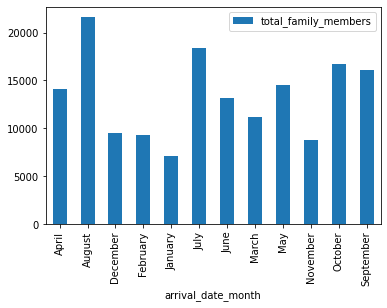

In [ ]:
plt.figure(figsize=(12,6))
max_family = df.groupby(['arrival_date_month']).aggregate({'total_family_members':'sum'})
max_family.plot(kind='bar')




*  Highest arrival month is august 
*  lowest arrival month is january



<Figure size 864x864 with 0 Axes>

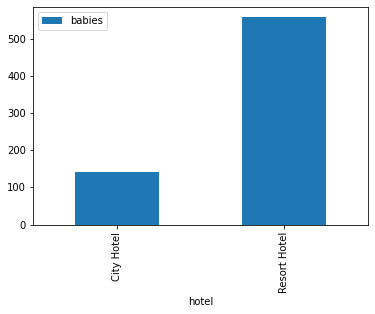

In [ ]:
plt.figure(figsize=(12,12))
max_family = df.groupby(['hotel']).aggregate({'babies':'sum'})
max_family.plot(kind='bar')



*   Highest number of babies are arrived in city hotels than resort hotels
  



Text(0.5, 1.0, 'yearly bookings')

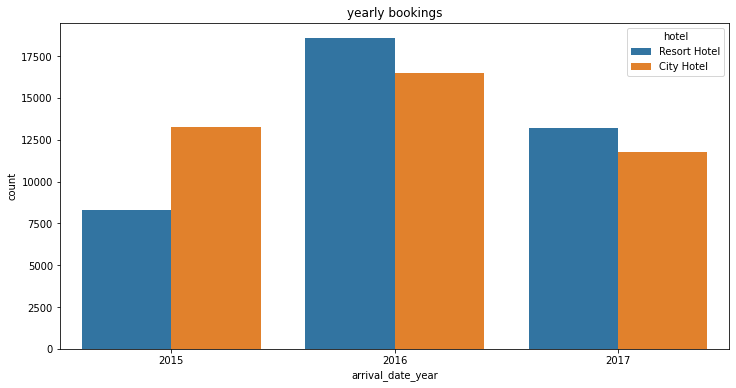

In [ ]:
plt.figure(figsize=(12,6)) 
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ('yearly bookings')



*   highest number of arrival occurered in the year 2016 
*   most people preffered resort hotels then city hotels



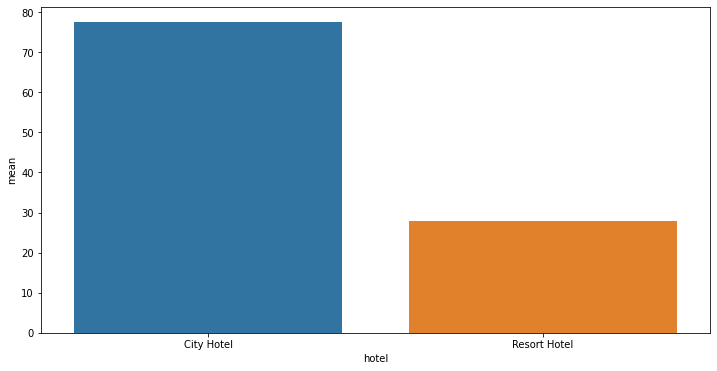

In [ ]:
plt.figure(figsize=(12,6))
a = df.groupby("hotel")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

Text(0.5, 1.0, ' percentage of cancelation')

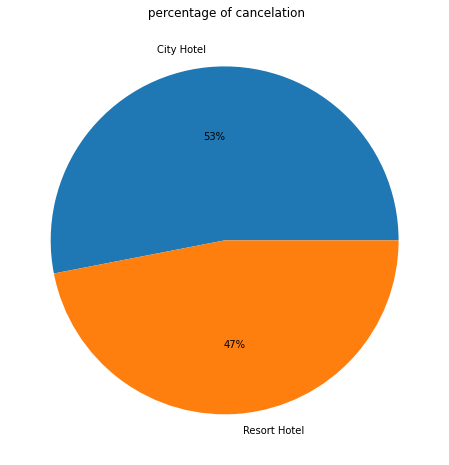

In [ ]:
df.hotel.value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(df.is_canceled.value_counts().head(5),autopct='%.0f%%', labels = (df.hotel.value_counts().head(5).keys()))
plt.title(' percentage of cancelation')




*  city hotels had more number of cancellation occured




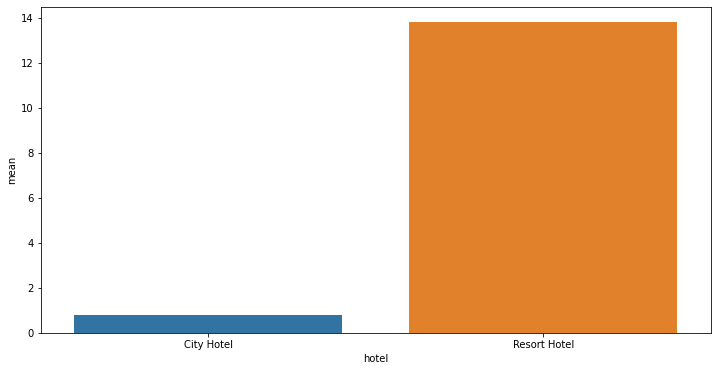

In [ ]:
plt.figure(figsize=(12,6))
a = df.groupby("hotel")['required_car_parking_spaces'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)



*   In resort hotels car parking space is higher than city hotels.



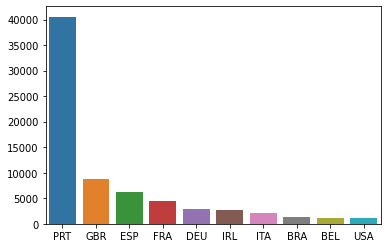

In [ ]:
size=(12,6)
sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))



*   Highest booking was from Portugal.
*   Least from United states of america.



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

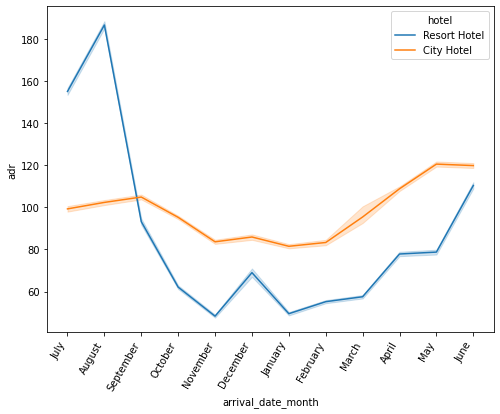

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.xticks(
    rotation=60,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)



   **RESORT HOTELS**


*   Highest average daily rate was at month of august
*   Lowest rate was at month of november


   **CITY HOTELS**


*   Highest average daily rate was at month of may
*   lowest rate was at month of january





Text(0.5, 1.0, ' most reserved room type')

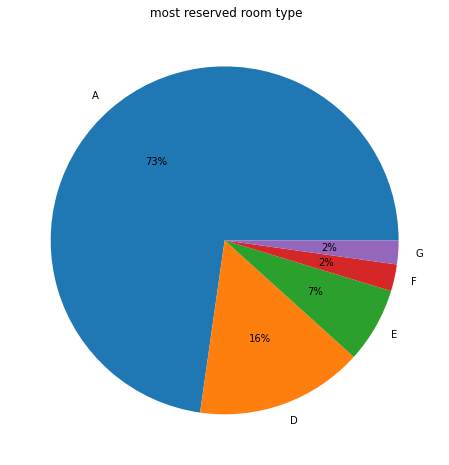

In [ ]:
df.reserved_room_type.value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(df.reserved_room_type.value_counts().head(5),autopct='%.0f%%', labels = (df.reserved_room_type.value_counts().head(5).keys()))
plt.title(' most reserved room type')



*   Most reserved room type is A (73%)
*  Least reserved room type is F&G(2%) 



**conclusion**


* Since the highest arrival month is august it may find difficult to get a hotel room in august.

*  Most of the people preferred city hotels over resort hotels.


*   since the highest number of cancellation occurred in city hotels,the customers may face some issues or unsatisfaction.
*   Families with babies with preferred resort hotels over city hotels.

*   It is more comfortable to choose resort hotels for families with babies and city hotels have less car parking space.





